## 데이터

In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [25]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2, seed=123)

In [ ]:
x_train[:5]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 2, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59

이미 인코딩된 데이터임

### 데이터 확인

In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [ ]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


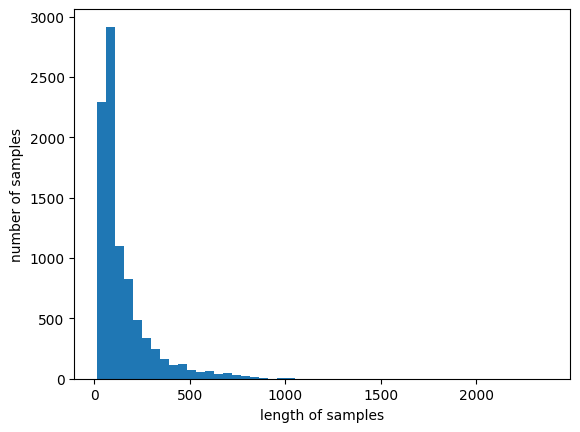

In [ ]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

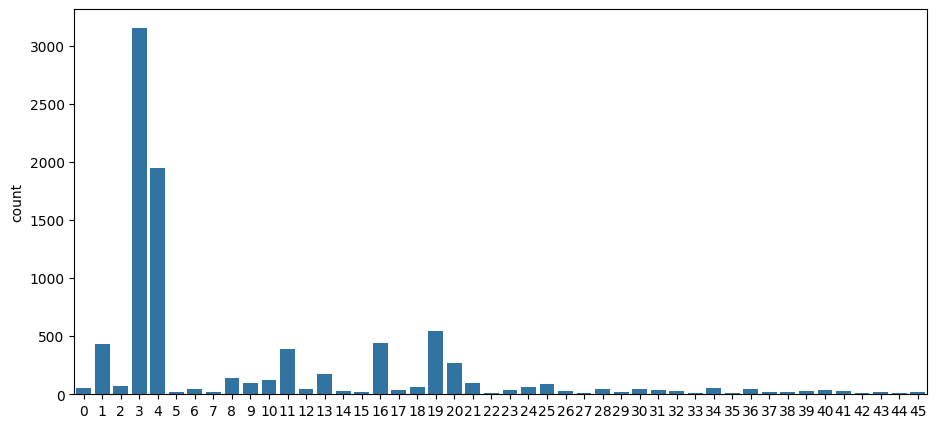

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


### 디코딩

In [29]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print("단어사전 길이:", len(word_index))
index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

단어사전 길이: 30979


In [ ]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
# train 데이터 변환
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
# test 데이터 변환
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


### 벡터화

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

In [ ]:
# TF-IDF 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

In [ ]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

## 모델링

In [ ]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

### 나이브 베이즈 분류기

In [ ]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [ ]:
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


### Complement Naive Bayes Classifier(CNB)

In [ ]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [ ]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


### 로지스틱 회귀(Logistic Regression)

In [ ]:
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

In [ ]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

### 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [ ]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [ ]:
# Linear SVC 테스트 데이터에 대한 예측해보세요
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

### 결정 트리(Decision Tree)

In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

In [ ]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

### 랜덤 포레스트(Random Forest)

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

In [ ]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

### 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [ ]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

In [ ]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

### 보팅

In [ ]:
LR = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
CNB = ComplementNB()
GB = GradientBoostingClassifier(random_state=0)
estimators = [('lr', LR), ('cnb', CNB), ('gb', GB)]
voting_classifier =  VotingClassifier(estimators=estimators, voting='soft', )
voting_classifier.fit(tfidfv, y_train)

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

## 단어사전 크기 별 비교 실험

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [17]:
def decoding(data):
  word_index = reuters.get_word_index(path="reuters_word_index.json")
  index_to_word = { index+3 : word for word, index in word_index.items() }
  # index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
  for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

  decoded = []
  for i in range(len(data)):
    t = ' '.join([index_to_word[index] for index in data[i]])
    decoded.append(t)
  return decoded

def prepare_data(vocab_size):
  (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2, seed=123)
  x_train = decoding(x_train)
  x_test = decoding(x_test)
  # DTM 생성
  dtmvector = CountVectorizer()
  x_train_dtm = dtmvector.fit_transform(x_train)
  x_test_dtm = dtmvector.transform(x_test)
  # TF-IDF 생성
  tfidf_transformer = TfidfTransformer()
  tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
  tfidfv_test = tfidf_transformer.transform(x_test_dtm)
  return tfidfv, y_train, tfidfv_test, y_test

def train(model, x_train, y_train, x_test, y_test):
  model.fit(x_train, y_train)
  predicted = model.predict(x_test) #테스트 데이터에 대한 예측
  #예측값과 실제값 비교
  return model, accuracy_score(y_test, predicted)

def experiment(vocab_size):
  tfidfv, y_train, tfidfv_test, y_test = prepare_data(vocab_size)
  # 학습
  best_model = None
  best_acc = 0
  #  Complement Naive Bayes Classifier
  cb = ComplementNB()
  cb, result_cb = train(cb, tfidfv, y_train, tfidfv_test, y_test)
  print(f" Complement Naive Bayes 분류기 정확도: {result_cb}")
  best_model = cb
  best_acc = result_cb
  # 로지스틱 회귀
  lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
  lr, result_lr = train(lr, tfidfv, y_train, tfidfv_test, y_test)
  print(f"로지스틱 회귀 정확도: {result_lr}")
  if result_lr > best_acc:
    best_model = lr
    best_acc = result_lr
  # 랜덤 포레스트
  forest = RandomForestClassifier(n_estimators=5, random_state=0)
  forest, result_fr = train(forest, tfidfv, y_train, tfidfv_test, y_test)
  print(f"랜덤 포레스트 정확도: {result_fr}")
  if result_fr > best_acc:
    best_model = forest

  return best_model

> 모델 선택 이유  
- Complement Naive Bayes Classifier: 단순한 모델을 사용해보고 싶었음. 하지만 일반 나이브 베이즈는 불균형한 클래스에서 성능이 좋지 않기 때문에 CNB를 선택함  
- 로지스틱 회귀: 노드에서 돌려본 결과 단일 모델로는 가장 성능이 좋았음
- 랜덤 포레스트: 앙상블 모델을 사용해보고 싶었는데 그래디언트 부스팅과 보팅 방식은 시간이 너무 오래 걸려 랜덤 포레스트를 선택함

In [3]:
print("[단어사전 크기 3000]")
best_model3 = experiment(3000)

[단어사전 크기 3000]
 Complement Naive Bayes 분류기 정확도: 0.7764915405164737
로지스틱 회귀 정확도: 0.796527159394479
랜덤 포레스트 정확도: 0.7101513802315227


In [4]:
print("[단어사전 크기 5000]")
best_model5 = experiment(5000)

[단어사전 크기 5000]
 Complement Naive Bayes 분류기 정확도: 0.7778272484416741
로지스틱 회귀 정확도: 0.8094390026714159
랜덤 포레스트 정확도: 0.7119323241317899


In [5]:
print("[단어사전 크기 7000]")
best_model7 = experiment(7000)

[단어사전 크기 7000]
 Complement Naive Bayes 분류기 정확도: 0.780053428317008
로지스틱 회귀 정확도: 0.8121104185218165
랜덤 포레스트 정확도: 0.6896705253784505


In [6]:
print("[단어사전 크기 10000]")
best_model10 = experiment(10000)

[단어사전 크기 10000]
 Complement Naive Bayes 분류기 정확도: 0.7831700801424755
로지스틱 회귀 정확도: 0.8116651825467498
랜덤 포레스트 정확도: 0.6794300979519146


In [7]:
print("[단어사전 크기 20000]")
best_model20 = experiment(20000)

[단어사전 크기 20000]
 Complement Naive Bayes 분류기 정확도: 0.780053428317008
로지스틱 회귀 정확도: 0.815227070347284
랜덤 포레스트 정확도: 0.6607301869991096


In [8]:
print("[단어사전 크기 25000]")
best_model25 = experiment(25000)

[단어사전 크기 25000]
 Complement Naive Bayes 분류기 정확도: 0.776046304541407
로지스틱 회귀 정확도: 0.8170080142475512
랜덤 포레스트 정확도: 0.6731967943009796


In [9]:
print("[단어사전 크기 30000]")
best_model30 = experiment(30000)

[단어사전 크기 30000]
 Complement Naive Bayes 분류기 정확도: 0.773820124666073
로지스틱 회귀 정확도: 0.8183437221727515
랜덤 포레스트 정확도: 0.6629563668744435


In [10]:
print("[단어사전 크기 35000]")
best_model35 = experiment(35000)

[단어사전 크기 35000]
 Complement Naive Bayes 분류기 정확도: 0.7747105966162066
로지스틱 회귀 정확도: 0.8170080142475512
랜덤 포레스트 정확도: 0.6589492430988424


In [12]:
print("[단어사전 크기 제한 없음]")
best_model = experiment(None)

[단어사전 크기 제한 없음]
 Complement Naive Bayes 분류기 정확도: 0.7747105966162066
로지스틱 회귀 정확도: 0.8170080142475512
랜덤 포레스트 정확도: 0.6674087266251113


### 비교 결과 시각화

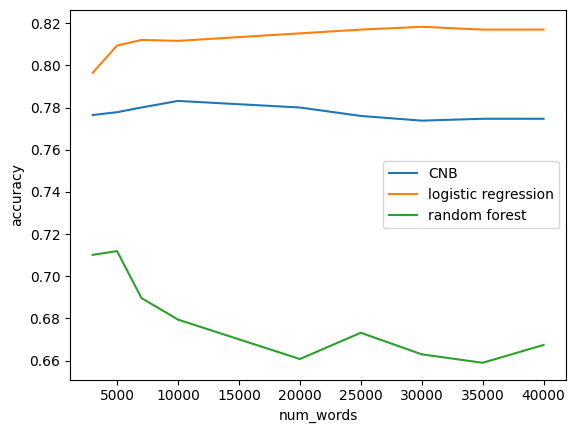

In [39]:
import matplotlib.pyplot as plt

x = [3000, 5000, 7000, 10000, 20000, 25000, 30000, 35000, 40000]
cb_acc = [0.7764915405164737, 0.7778272484416741, 0.780053428317008, 0.7831700801424755, 0.780053428317008, 0.776046304541407, 0.773820124666073, 0.7747105966162066, 0.7747105966162066]
lr_acc = [0.796527159394479, 0.8094390026714159, 0.8121104185218165, 0.8116651825467498, 0.815227070347284, 0.8170080142475512, 0.8183437221727515, 0.8170080142475512, 0.8170080142475512]
rf_acc = [0.7101513802315227, 0.7119323241317899, 0.6896705253784505, 0.6794300979519146, 0.6607301869991096, 0.6731967943009796, 0.6629563668744435, 0.6589492430988424, 0.6674087266251113]
plt.plot(x, cb_acc, label='CNB')
plt.plot(x, lr_acc, label='logistic regression')
plt.plot(x, rf_acc, label='random forest')
plt.xlabel('num_words')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## 평가

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
tfidfv, y_train, tfidfv_test, y_test = prepare_data(30000)
print(classification_report(y_test, best_model30.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.85      0.87      0.86       116
           2       0.71      0.67      0.69        18
           3       0.91      0.90      0.91       774
           4       0.84      0.89      0.86       507
           5       0.00      0.00      0.00         5
           6       0.92      1.00      0.96        12
           7       0.75      0.75      0.75         4
           8       0.76      0.62      0.68        42
           9       0.91      0.97      0.94        30
          10       0.94      0.86      0.90        36
          11       0.73      0.77      0.75        99
          12       0.80      0.40      0.53        10
          13       0.62      0.67      0.65        30
          14       1.00      0.60      0.75         5
          15       0.00      0.00      0.00         1
          16       0.71      0.77      0.74       105
          17       0.75    

In [19]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

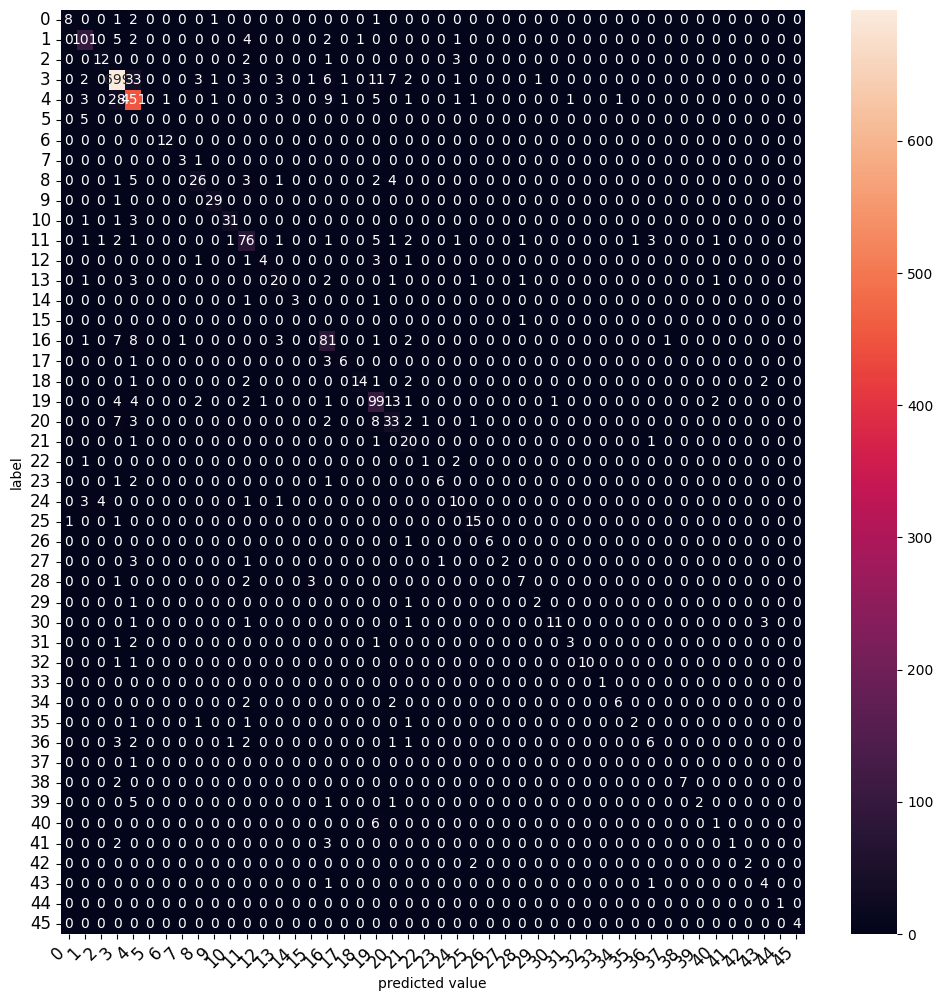

In [21]:
graph_confusion_matrix(best_model30, tfidfv_test, y_test)